### Importing Libraries



In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Importing the datasets



In [4]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


The `train` set has a little over 10K records whereas the `test` set has around 6.5K records. 

The `test` dataset contains all columns as the `train` set except for the response variables - `casual`, `registered` and `count`

### Data Fields

- **datetime** - hourly date + timestamp<br/>
- **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter <br/>
- **holiday** - whether the day is considered a holiday<br/>
- **workingday** - whether the day is neither a weekend nor holiday
- **weather** - <br/>
      1: Clear, Few clouds, Partly cloudy, Partly cloudy <br/>
      2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br/>
      3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br/>
	  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br/>
- **temp** - temperature in Celsius<br/>
- **atemp** - "feels like" temperature in Celsius<br/>
- **humidity** - relative humidity<br/>
- **windspeed** - wind speed<br/>
- **casual** - number of non-registered user rentals initiated<br/>
- **registered** - number of registered user rentals initiated<br/>
- **count** - number of total rentals<br/>

### Check for Missing Values

In [6]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

Here, we can see that neither the `train` set nor the `test` set has any missing values. 

### Correlation Analysis

The `corr()` method finds the . In the heaatmap method of seaborn, we pass the correlation matrix along with 4 other parameters : 

- `mask` - to mask the upper half of the correlation plot. (Avoid displaying the same values on the upper half and causing confusion)
- `vmax` - the maximum value of the legend (default 1)
- `square` - so that the title will be a square and not a rectangle
- `annot` - to display the corresponding correlation number on each tile 

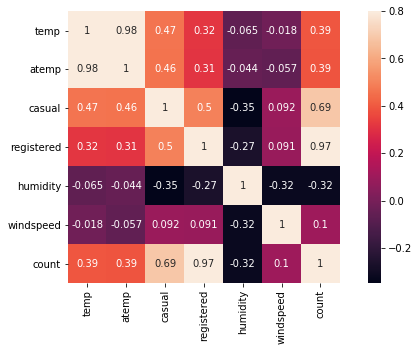

In [20]:
corrMatt = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,5)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)